In [1]:
import sys
sys.path.append("../src/")
from model_utils import *

import os
import copy
import shutil
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from neuro_morpho_toolbox import bs
import tensorflow as tf
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn import manifold
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.base import clone

from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs
D:\ProgramData\Anaconda3\lib\site-packages\neuro_morpho_toolbox-0.1-py3.7.egg\neuro_morpho_toolbox\
Loading CCF Atlas data...
Loading time: 0.46
Loading CCF brain structure data...
Loading time: 0.00
Loading selected CCF Atlas and Contour data...
Loading time: 0.82


In [2]:
f=open('../final_data/word2vec/1074_data.pickle',"rb+")
data=pickle.load(f)
f.close()

In [3]:
len(data)

1074

In [4]:
loc_path = '../final_data/word2vec/data_augmentation'
loc_files = os.listdir(loc_path)
for file in loc_files:
    print(file)
    f_path = loc_path+'/'+file
    f=open(f_path,"rb+")
    tmp=pickle.load(f)
    f.close()
    data = pd.concat([data,tmp],axis=0)
data

1074_data_loc10.pickle
1074_data_loc15.pickle
1074_data_loc20.pickle
1074_data_loc5.pickle


,scaled_x,scaled_y,scaled_z,node_type,region,x,y,z,type,flag,label,label_
17300_3426_x20339_y44872,"[0.7836440054693636, 0.7962633271598887, 0.809...","[0.32802501771670045, 0.3052996256355399, 0.28...","[0.7136284793199191, 0.7151583948935107, 0.716...",ggbggggtgggggbggggtgggtgggbgggggggtbggggggtggg...,SSs SSs SSs SSs SSs SSs SSs SSs SSs SSs SSs SS...,"[5199.45, 5213.375, 5228.475, 5229.175, 5233.3...","[3471.15, 3457.775, 3445.075, 3441.075, 3427.9...","[9642.925, 9646.9, 9650.7, 9654.55, 9671.875, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",SSs,6
17302_00001,"[-0.9148473639992803, -0.9072385786799245, -0....","[-0.43627579540547146, -0.4073554590670744, -0...","[1.0474511768574404, 1.0330302419379769, 1.025...",ggggggtggggbggggtgggtgbggggggggtgggggtgbgggggg...,fiber_tracts fiber_tracts CP CP CP CP CP fiber...,"[5021.475, 5033.525, 5041.925, 5048.225, 5057....","[4873.7, 4880.325, 4891.925, 4897.9, 4895.125,...","[9016.775, 9007.325, 9002.2, 8992.15, 8979.275...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",CP,0
17302_00002,"[-1.2120101762570863, -1.2121138461830727, -1....","[-0.2030911380801494, -0.21494316901041977, -0...","[1.2957575056498944, 1.2948191272750147, 1.298...",bggbggggggtggggtbgggggtbggggggtggggggtbbgggggg...,CLA CLA CLA CLA CLA CLA CLA CLA CLA CLA CLA CL...,"[4877.775, 4877.6, 4876.025, 4878.725, 4878.72...","[4889.7, 4886.725, 4871.675, 4854.8, 4854.775,...","[8997.0, 8996.375, 8998.85, 8998.05, 8998.05, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CP,0
17302_00003,"[-0.9362538499837446, -0.9361136847041148, -0....","[-0.7027983848484955, -0.703313367204449, -0.7...","[1.0909307561326895, 1.0909307561326895, 1.104...",bggggggggtbgggggggtggggggtgbgggggggtbgggggtggg...,CLA CLA CLA CLA CLA CLA GU GU GU GU CLA CLA CL...,"[5031.3, 5031.525, 5033.375, 5033.35, 5034.925...","[4817.625, 4817.525, 4806.7, 4792.45, 4779.475...","[9147.45, 9147.45, 9156.775, 9162.0, 9167.575,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CP,0
17302_00005,"[-0.9341467333351394, -0.9350042012463409, -0....","[-0.8165398324258905, -0.7738232189876638, -0....","[0.9966398118215704, 0.9817437970381586, 0.979...",gbbggggggtgggggggtgbgggggggtgggggggtggbggggggt...,CP CP CP CP CP CP CP CP CP CP CP CP CP CP CP C...,"[4822.0, 4820.625, 4821.55, 4825.25, 4832.4, 4...","[4623.075, 4634.75, 4641.325, 4646.175, 4651.4...","[8805.2, 8797.35, 8796.125, 8792.825, 8782.125...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",CP,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18869_5393_x8284_y3671,"[-1.0802174840177508, -1.0975774037172352, -1....","[-1.8531025184389984, -1.8358068105818528, -1....","[1.036356185187407, 1.052754324031022, 1.07687...",bgggggggtgggggggtbggggggggtbgbgggggtgggggtgbgg...,SSp-ul SSp-ul SSp-ul SSp-ul SSp-ul SSp-ul SSp-...,"[6547.282356493049, 6535.228772805744, 6522.91...","[1509.4585687033032, 1530.9606086233707, 1542....","[7946.49964885079, 7956.970588816092, 7972.375...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",SSp-L5,5
18869_5553_x7275_y3994,"[-0.8623888626174178, -0.8495025311415669, -0....","[-1.6768431291375805, -1.6604307401721539, -1....","[1.2763100144766952, 1.290170700421258, 1.2998...",bbggggtgbgggggtggggggtbgbgggggggtbggggtggggtgb...,SSp-bfd SSp-bfd SSp-bfd SSp-bfd SSp-bfd SSp-bf...,"[6895.092471673056, 6908.17588138919, 6910.974...","[1768.5799194916024, 1792.5456351753503, 1785....","[8425.586569124584, 8437.914299628688, 8446.50...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",SSp-L5,5
18869_5754_x7159_y3959,"[0.5998071769474669, 0.956790620246993, 1.0289...","[-1.1916547096474623, 0

In [5]:
words_list=((list(data['region'])))

In [6]:
regions=[i.split() for i in words_list]

In [7]:
len(regions)

5370

In [8]:
# train your model 
# model=Word2Vec(regions,  size=6, window=50, min_count=10, workers=4, sg=1)

# load trained model
model = Word2Vec.load("../final_data/w2v_model_6dim_from_1200_seu.model")

In [9]:
# save current model
# model.save(r"w2v_model_6dim_from_1700_seu.model")

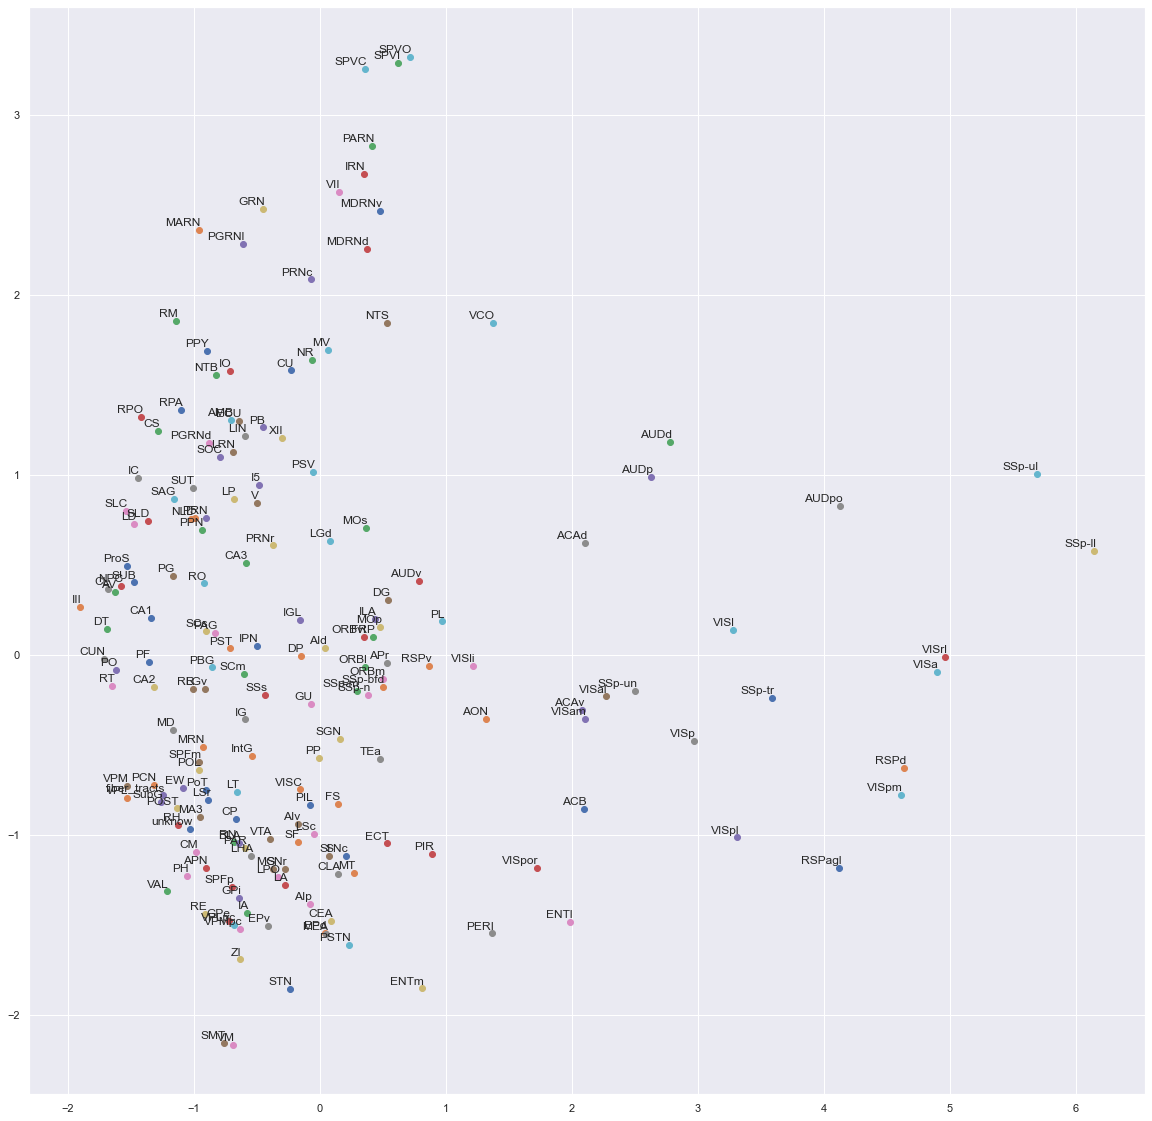

In [10]:
sns.set(font_scale=1.0)
vectors=StandardScaler().fit_transform(model.wv.vectors.copy())

pca=PCA(2)
vectors=pca.fit_transform(vectors)
# vectors=StandardScaler().fit_transform(vectors)

region_vectors=pd.DataFrame({'region':model.wv.index2word,'vector_x0':vectors[:,0],'vector_x1':vectors[:,1]})
plt.figure(figsize=(20, 20)) #定义画布大小
for i in range(len(region_vectors)):
    plt.scatter(region_vectors.iloc[i,1],region_vectors.iloc[i,2])
    plt.annotate(region_vectors.iloc[i,0],
                 xy=(region_vectors.iloc[i,1],region_vectors.iloc[i,2]),
                 xytext=(2, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
# plt.savefig(r'region_vec.png')

In [11]:
# vectors=StandardScaler().fit_transform(model.wv.vectors.copy())
vectors = TSNE(n_components=2,perplexity=20,random_state=9).fit_transform(model.wv.vectors.copy())

# vectors=StandardScaler().fit_transform(vectors)

region_vectors=pd.DataFrame({'region':model.wv.index2word,'vector_x0':vectors[:,0],'vector_x1':vectors[:,1]})

region_vectors['vector_x0']=vectors[:,0]
region_vectors['vector_x1']=vectors[:,1]
color_map_recorder={}
region_vectors

,region,vector_x0,vector_x1
0,CP,-13.533547,2.521007
1,SSp-bfd,-18.311684,-6.069184
2,SSp-m,-17.271236,-5.103603
3,SSs,-15.844231,-5.903286
4,fiber_tracts,-10.416821,4.336040
...,...,...,...
178,PAR,-4.823102,-3.615908
179,RO,3.623458,16.341482
180,LSr,-8.919087,0.474441
181,III,6.827976,-1.430024


In [12]:
# region_vectors['region'] = region_vectors['sc_region'].apply(lambda r:r.split('_')[1] if (r not in ['unknow','fiber_tracts']) else r)
# region_vectors

In [13]:
level={}
c=0
level_num=4

region_vectors.loc[region_vectors.region=='fiber_tracts','region']='fiber tracts'
region_vectors['level']=0
color_level='color_level'+str(level_num)

for i in region_vectors.index.tolist():
    region=region_vectors.loc[i,'region']
    if len(bs.level.loc[bs.level.Abbreviation==region,'level']):
        region_vectors.loc[i,'level']=bs.level.loc[bs.level.Abbreviation==region,'level'].iloc[0]

region_vectors[color_level]=0
for i in  bs.level[bs.level.level==level_num].index.tolist(): # level_num同级的所有region，i代表这个region的编号ID
    name=bs.id_to_name(i) # 得到这个id对应的region名称
    id_list=bs.get_all_child_id(i) # 该region的所有子集
    name_list=[] # 
    for j in id_list:
        name_list.append(bs.id_to_name(j))
    level[name]=name_list # 该level_num下的所有的脑区做keys,对应的值为region的子脑区
# level
TH_id=bs.get_all_child_id('TH')
TH_name=[bs.id_to_name(i) for i in TH_id]
level['TH']=TH_name

HY_id=bs.get_all_child_id('HY')
HY_name=[bs.id_to_name(i) for i in HY_id]
level['HY']=HY_name

del level['IB']
del level['CBX']

if color_level not in color_map_recorder.keys():
    color_map_recorder[color_level]={}
for k,v in level.items():
    for i in region_vectors.index.tolist():
        region=str(region_vectors.loc[i,'region'])
        if region in v:
#             if region == 'LGd':
#                 print(k)
            region_vectors.loc[i,color_level]=k
# region_vectors.loc[region_vectors.region!='unknow']

In [14]:
region_vectors=region_vectors.loc[region_vectors.region!='unknow']
region_vectors=region_vectors.loc[region_vectors.region!='fiber tracts']
region_vectors=region_vectors[region_vectors.color_level4!=0]

region_vectors

,region,vector_x0,vector_x1,level,color_level4
0,CP,-13.533547,2.521007,7,CNU
1,SSp-bfd,-18.311684,-6.069184,9,CTX
2,SSp-m,-17.271236,-5.103603,9,CTX
3,SSs,-15.844231,-5.903286,8,CTX
5,VPM,8.174770,-4.144828,9,TH
...,...,...,...,...,...
178,PAR,-4.823102,-3.615908,8,CTX
179,RO,3.623458,16.341482,7,HB
180,LSr,-8.919087,0.474441,8,CNU
181,III,6.827976,-1.430024,6,MB


In [15]:
region_vectors.to_csv('./region_vectors.csv',sep=' ',index=None)

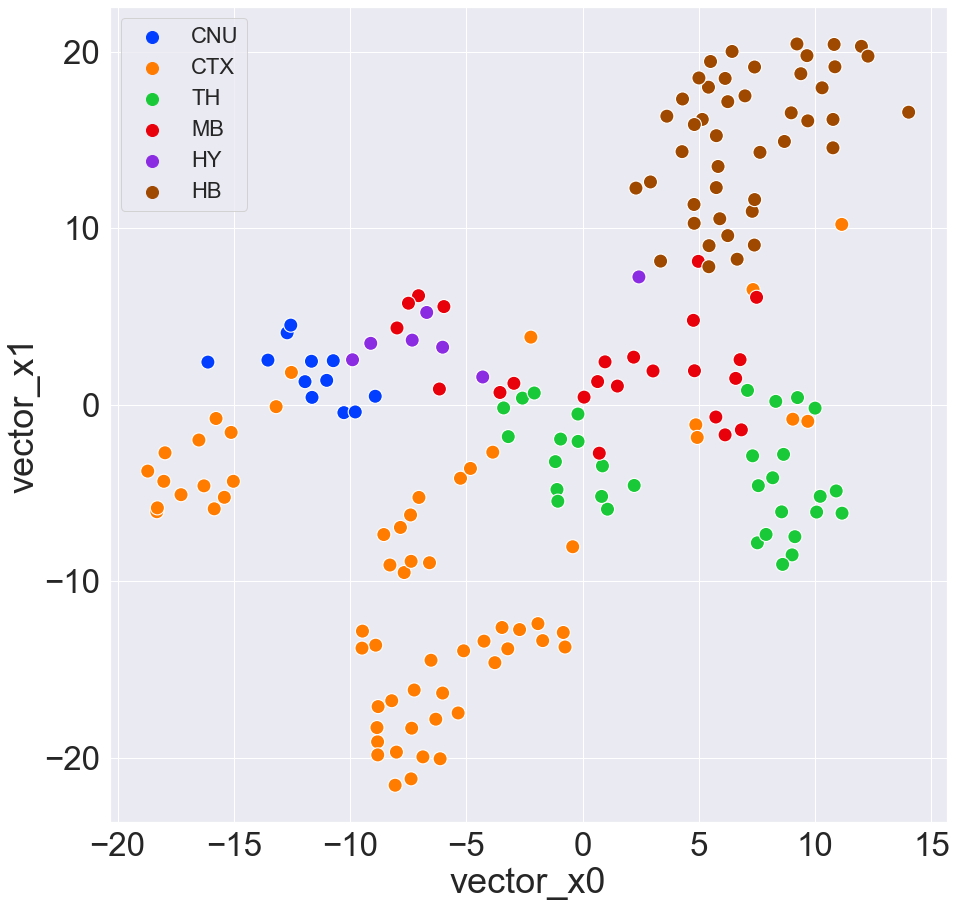

In [19]:
sns.set(font_scale=3)
plt.figure(figsize=(15, 15)) #定义画布大小
# for i in range(len(region_vectors)):
region_vectors.rename(columns={'color_level4':'Region'},inplace=True)
sns.scatterplot(x='vector_x0',y='vector_x1',hue='Region',data=region_vectors,palette="bright",s=200)
plt.legend(markerscale=2, fontsize=22)
# plt.title('distributed respresentations of brain regions')
plt.savefig(r'w2v.png', dpi=200)

In [15]:
region_vectors

In [13]:
data=region_vectors[['region','Region']]
x_list=[]
for i in  data.index.tolist():
    tmp_region=data.loc[i,'region']
    x_list.append(model.wv[tmp_region])
x=np.vstack(x_list)
print("x shape: ",x.shape)
data

x shape:  (181, 6)


,region,Region
0,CP,CNU
1,SSp-bfd,CTX
2,SSp-m,CTX
3,SSs,CTX
5,VPM,TH
...,...,...
178,PAR,CTX
179,RO,HB
180,LSr,CNU
181,III,MB
